In [2]:
from sympy import *
init_printing()
x,y,z=symbols('x y z')

## Solving equations
__NOTE__: Symbolic equations in SymPy are not represented by __`=`__ or __`==`__, but by __`Eq`__.

In [3]:
Eq(x, y)

### In SymPy, any expression not in an `Eq` is automatically assumed to equal 0 by the solving functions. Since `a=b` if and only if `a−b=0`, this means that instead of using `x == y`, you can just use `x - y`

In [4]:
solveset(Eq(x**2, 1), x)

In [5]:
solveset(Eq(x**2 - 1, 0), x)

In [6]:
solveset(x**2 - 1, x)

## Solving Equations Algebraically
The main function for solving algebraic equations is __`solveset`__. The syntax for solveset is __`solveset(equation, variable=None, domain=S.Complexes)`__ where equations may be in the form of `Eq` instances or expressions that are assumed to be equal to zero.

In [7]:
solveset(x**2 - x, x)

In [8]:
solveset(x - x, x, domain=S.Reals)

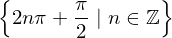

In [9]:
solveset(sin(x) - 1, x, domain=S.Reals)

In [10]:
solveset(x**4 - 1, x, domain=S.Reals)

In [11]:
solveset(x**4 - 1, x)

### In the `solveset` module, the linear system of equations is solved using `linsolve`.

#### Linear system form

In [12]:
linsolve([x + y + z - 1, x + y + 2*z - 3 ], (x, y, z))

#### Augmented matrix form

In [13]:
linsolve(Matrix(([1, 1, 1, 1], [1, 1, 2, 3])), (x, y, z))

### In the `solveset` module, a non linear system of equations is solved using `nonlinsolve`. 

In [16]:
nonlinsolve([x**2 + 1, y**2 + z], [x, y, z])

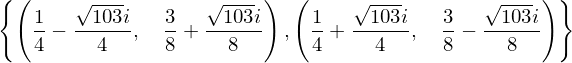

In [24]:
nonlinsolve([x**2+y+6,2*y+x-1],[x,y])

### Currently `nonlinsolve` is not properly capable of solving the system of equations having trigonometric functions. Use `solve` instead

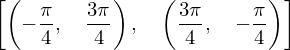

In [30]:
solve([sin(x + y)-1, cos(x - y)+1], [x, y])

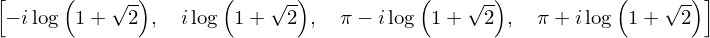

In [34]:
solve(sin(x)**2+1, x)

## Solving Differential Equations
First, create an undefined function by passing __`cls=Function`__ to the symbols function.

In [35]:
f, g = symbols('f g', cls=Function)

`f` and `g` are now undefined functions. We can call `f(x)`, and it will represent an unknown function.

In [36]:
f(x)

Derivatives of `f(x)` are unevaluated.

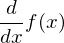

In [37]:
f(x).diff(x)

To represent the differential equation $f^{′′}(x)−2f^′(x)+f(x)=sin(x)$, we would thus use

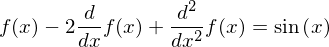

In [38]:
diffeq = Eq(f(x).diff(x, x) - 2*f(x).diff(x) + f(x), sin(x))
diffeq

To solve the ODE, pass it and the function to solve for to __`dsolve`__. Remember to solve for `f(x` not for `x`

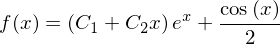

In [39]:
dsolve(diffeq, f(x))

`dsolve` returns an instance of `Eq`. This is because in general, solutions to differential equations cannot be solved explicitly for the function. The arbitrary constants in the solutions from dsolve are symbols of the form `C1`, `C2`, `C3`, and so on.

## Matrices

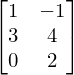

In [40]:
Matrix([[1, -1], [3, 4], [0, 2]])

In [41]:
Matrix([1, 2, 3])

In [42]:
M = Matrix([[1, 2, 3], [3, 2, 1]])
N = Matrix([0, 1, 1])
M*N

### Shape, indexing, deleting

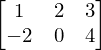

In [51]:
M = Matrix([[1, 2, 3], [-2, 0, 4]])
M

In [52]:
M.shape

In [53]:
M.row(0)

In [54]:
M.col(-1)

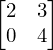

In [55]:
M.col_del(0)
M

In [56]:
M.row_del(1)
M

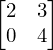

In [59]:
M = M.row_insert(1, Matrix([[0, 4]]))
M

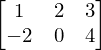

In [60]:
M = M.col_insert(0, Matrix([1, -2]))
M

### Basic operations, special matrices

In [61]:
M = Matrix([[1, 3], [-2, 3]])
N = Matrix([[0, 3], [0, 7]])

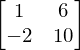

In [62]:
M+N

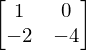

In [63]:
M-N

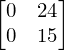

In [64]:
M*N

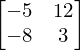

In [66]:
M**2

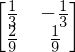

In [67]:
M**-1

In [69]:
try: N**-1
except ValueError as e: print(e)

Matrix det == 0; not invertible.


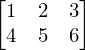

In [74]:
M = Matrix([[1, 2, 3], [4, 5, 6]])
M

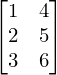

In [75]:
M.T

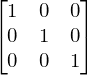

In [70]:
eye(3)

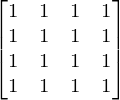

In [71]:
ones(4)

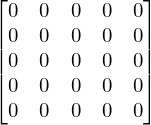

In [72]:
zeros(5)

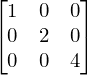

In [76]:
diag(1,2,4)

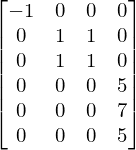

In [77]:
diag(-1, ones(2, 2), Matrix([5, 7, 5]))

### Determinant

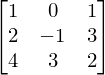

In [78]:
M = Matrix([[1, 0, 1], [2, -1, 3], [4, 3, 2]])
M

In [80]:
M.det()

### Reduced row echelon form
To put a matrix into reduced row echelon form, use `rref`. `rref` returns a tuple of two elements. The first is the reduced row echelon form, and the second is a tuple of indices of the pivot columns.

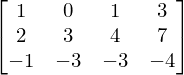

In [81]:
M = Matrix([[1, 0, 1, 3], [2, 3, 4, 7], [-1, -3, -3, -4]])
M

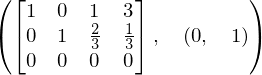

In [82]:
M.rref()

### Nullspace and columnspace

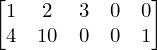

In [83]:
M = Matrix([[1, 2, 3, 0, 0], [4, 10, 0, 0, 1]])
M

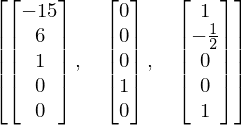

In [84]:
M.nullspace()

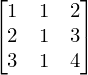

In [85]:
M = Matrix([[1, 1, 2], [2 ,1 , 3], [3 , 1, 4]])
M

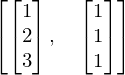

In [86]:
M.columnspace()

### Eigenvalues, Eigenvectors, Diagonalization, and Characteristic polynomial

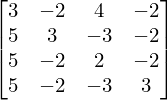

In [87]:
M = Matrix([[3, -2,  4, -2], [5,  3, -3, -2], [5, -2,  2, -2], [5, -2, -3,  3]])
M

In [88]:
M.eigenvals()

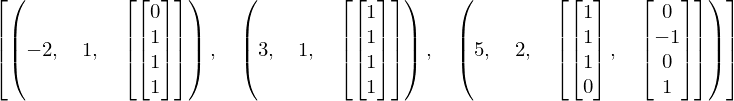

In [89]:
M.eigenvects()

In [90]:
P, D = M.diagonalize()

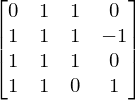

In [91]:
P

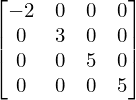

In [92]:
D

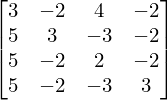

In [93]:
P*D*P**-1

In [96]:
P*D*P**-1==M

True

In [99]:
M.charpoly()